In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import os
from velocity_nn_util import *
import hdf5storage as h5mat
import h5py as h5
import subprocess
import time

## define variables

In [2]:
model_output_directory = '/net/server/homes/sep/stuart/courses/CS230/project/velocitynn/data/layers/models'
model_output_prefix = '600x200x10000_flat'

num_models = 10000
dz = dx = 10 # sampling interval in z and x direction
nz = 200 # number of indices in z direction 
nx = 600 # number of indices in x direction
vmin = 1500 #min velocity value in m/sec
vmax = 3500 #max velocity value in m/sec
dvmin = -400 # minimum d_velocity in m/sec. min change in velocity between layers.
dvmax = 400 # maximum d_velocity in m/sec. max change in velocity between layers
maxdip=0 # max amount on dip in either direction
minthick=500 # min layer thickness (in meter float values not indices)
maxthick=2000 # max layer thickness (in meter float values not indices)

## ensure output directory exists

In [3]:
if (1 != os.path.isdir(model_output_directory)):
    print("error: " + model_output_directory + "does not exist... exiting now.")
    assert(False)

## for desired number of models, generate random model and write out 

In [4]:
models={}
#models['vp'] = np.zeros((nz,nx,num_models))

filename = model_output_directory + '/' + model_output_prefix + '.mat'

#clear file
cmd_clear = 'rm ' + filename
pipes = subprocess.Popen(cmd_clear,stdout=subprocess.PIPE, stderr=subprocess.PIPE,shell=True)
while (pipes.poll() is None):
    time.sleep(0.5)

for i in np.arange(num_models):
    
    #generate new model
    current = rand_2d_dipping(nx,nz,dx,dz,vmin,vmax,dvmin,dvmax,minthick,maxthick,maxdip)
    water = np.zeros((nz,nx))
    water[:25,:] = 1
    current[water==1]=1500;
    models['vp'+str(i)] = current 
    
    #print status
    if(i%(int(.1*num_models))==0):
        print(str(i) + "/" + str(num_models) + " models generated")

#save in hdf5 format
h5mat.savemat(filename, 
              models , 
              appendmat=False, 
              format='7.3', 
              store_python_metadata=True, 
              truncate_existing=True)   

0/10000 models generated
1000/10000 models generated
2000/10000 models generated
3000/10000 models generated
4000/10000 models generated
5000/10000 models generated
6000/10000 models generated
7000/10000 models generated
8000/10000 models generated
9000/10000 models generated


## sanity check... change test_example to an integer less than num_models to read that model to plot and make sure it looks correct

<HDF5 dataset "vp2": shape (600, 200), type "<f8">
(200, 600)


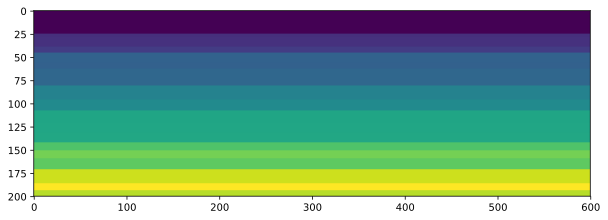

In [5]:
test_example = 2
filename_test = filename

dout = h5.File(filename_test,'r')
vp_test=dout['vp'+str(test_example)]
print(vp_test)
vp_test=np.transpose(vp_test[:,:])
print(vp_test.shape)

plt.figure(figsize=(10,10))
ax = plt.gca()
im = ax.imshow(vp_test[:,:])
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(im, cax=cax)